In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run headless Chrome for scraping without GUI
chrome_options.add_argument("--disable-gpu")
#y

In [12]:
# Set up the Chrome driver
driver_service = Service('chromedriver.exe')  # Update with your path to chromedriver
driver = webdriver.Chrome(service=driver_service, options=chrome_options)

In [13]:
# Open Jumia Tech Week page
driver.get('https://www.jumia.co.ke/mlp-tech-week/')

In [5]:
# Wait for products to load
wait = WebDriverWait(driver, 10)
wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'article.prd._fb.col.c-prd')))

[<selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64af52da1e", element="f.9234281F422E17123501FF2B86710135.d.9EF0CF105F371E300119F6C6F036BEF6.e.32")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64af52da1e", element="f.9234281F422E17123501FF2B86710135.d.9EF0CF105F371E300119F6C6F036BEF6.e.33")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64af52da1e", element="f.9234281F422E17123501FF2B86710135.d.9EF0CF105F371E300119F6C6F036BEF6.e.34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64af52da1e", element="f.9234281F422E17123501FF2B86710135.d.9EF0CF105F371E300119F6C6F036BEF6.e.35")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64af52da1e", element="f.9234281F422E17123501FF2B86710135.d.9EF0CF105F371E300119F6C6F036BEF6.e.36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="aa4f56ae08b8d7bb4787cb64a

In [6]:
# Extract page source and parse with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [7]:
# Close the driver
driver.quit()

In [8]:
# Extract product details
products = soup.find_all('article', class_='prd _fb col c-prd')
data = []

for product in products:
    try:
        title = product.find('h3', class_='name').text.strip()
    except:
        title = None

    try:
        price = product.find('div', class_='prc').text.strip()
    except:
        price = None

    try:
        old_price = product.find('div', class_='old').text.strip() if product.find('div', class_='old') else None
    except:
        old_price = None

    try:
        discount = product.find('div', class_='bdg _dsct _sm').text.strip() if product.find('div', class_='bdg _dsct _sm') else None
    except:
        discount = None

    try:
        rating = product.find('div', class_='stars _s').text.strip() if product.find('div', class_='stars _s') else None
    except:
        rating = None

    product_data = {
        'title': title,
        'price': price,
        'old_price': old_price,
        'discount': discount,
        'rating': rating
    }
    data.append(product_data)

In [9]:
# Convert to DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('jumia_techweek_products.csv', index=False)

In [10]:
print(df)

                                                title                price  \
0   Infinix Hot 30 - 6.78'' - 256GB +  8GB RAM - 5...           KSh 14,999   
1   Tecno CAMON 20 Pro, 6.67"256GB ROM+8GB RAM (Du...           KSh 25,499   
2   Infinix Hot 40i, 6.56", 128GB + 4GB, 5000 MAh,...           KSh 12,140   
3   Infinix Hot 30, 6.78",256GB+8GB RAM (Upto16GB)...           KSh 14,999   
4   Flame Super Fast Type-C to Type-C High Speed  ...              KSh 899   
5    Phone Case For Samsung S9 Plus \S9+ , Clear Case              KSh 999   
6              Pzx 10400Mah Portable Smart Power Bank            KSh 1,585   
7      Phone Case For Samsung S21 Case ( Hard Cover )              KSh 999   
8   Hikvision 8 HD 2MP Colored Day & Night CCTV Ca...           KSh 44,261   
9      SALAD/COOKING DISPENSER (TERMINAL) - A-T-M 20L           KSh 29,499   
10                                    Iphone Earphone            KSh 1,199   
11  TCL 55" C645&nbsp;QLED 4K Quantum Dot Google T...           

In [15]:
import seaborn as sns

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [17]:
data = {
    'title': [
        'Infinix Hot 30 - 6.78\'\' - 256GB + 8GB RAM - 5...',
        'Tecno CAMON 20 Pro, 6.67"256GB ROM+8GB RAM (Du...',
        'Infinix Hot 40i, 6.56", 128GB + 4GB, 5000 MAh,...',
        'Infinix Hot 30, 6.78",256GB+8GB RAM (Upto16GB)...',
        'Flame Super Fast Type-C to Type-C High Speed  ...',
        'Phone Case For Samsung S9 Plus \S9+ , Clear Case',
        'Pzx 10400Mah Portable Smart Power Bank',
        'Phone Case For Samsung S21 Case ( Hard Cover )',
        'Hikvision 8 HD 2MP Colored Day & Night CCTV Ca...',
        'SALAD/COOKING DISPENSER (TERMINAL) - A-T-M 20L',
        'Iphone Earphone',
        'TCL 55" C645&nbsp;QLED 4K Quantum Dot Google T...',
        'Infinix NOTE 30 PRO, 256ROM+8GB RAM, DISPLAY 6...',
        'Nilkin Phone Case For Samsung Galaxy Note 20 U...',
        'Replacement Battery For HP EliteBook 2530P 2540P',
        'Phone Case For Book Cover Case Galaxy Tab A 7 ...',
        'Amtec 32R1S,FRAMLESS 32" Inch Bluetooth SmartA...',
        'Tuya Smart Life WIFI GSM Alarm System Home Sec...',
        'Phone Case For Smartview Flip For Samsung S21 ...',
        'Oraimo HALO 4 Super Bass In-Ear Earphone',
        'Stickers Blue Butterfly Laptop Skin/Wrap/stick...',
        'Samsung 25W PD SuperFast Charging USB TYPE C P...',
        'Vivo V25 5G Diamond Black 64MP Camera, 8GB + 8...',
        'Phone Case For Samsung S20 Clear Cover',
        # Continue for all rows...
    ],
    'price': [
        'KSh 14,999',
        'KSh 25,499',
        'KSh 12,140',
        'KSh 14,999',
        'KSh 899',
        'KSh 999',
        'KSh 1,585',
        'KSh 999',
        'KSh 44,261',
        'KSh 29,499',
        'KSh 1,199',
        'KSh 63,199',
        'KSh 21,999',
        'KSh 1,950',
        'KSh 2,699',
        'KSh 1,199',
        'KSh 13,999',
        'KSh 19,950',
        'KSh 5,499',
        'KSh 899',
        'KSh 664 - KSh 1,500',
        'KSh 799',
        'KSh 24,999',
        'KSh 999',
        # Continue for all rows...
    ]
}

df = pd.DataFrame(data)


In [18]:
def clean_price(price):
    # Extract the numerical part of the price
    match = re.findall(r'\d+', price)
    if len(match) == 1:
        return int(match[0])
    elif len(match) == 2:
        return (int(match[0]) + int(match[1])) / 2
    return None

df['price'] = df['price'].apply(clean_price)


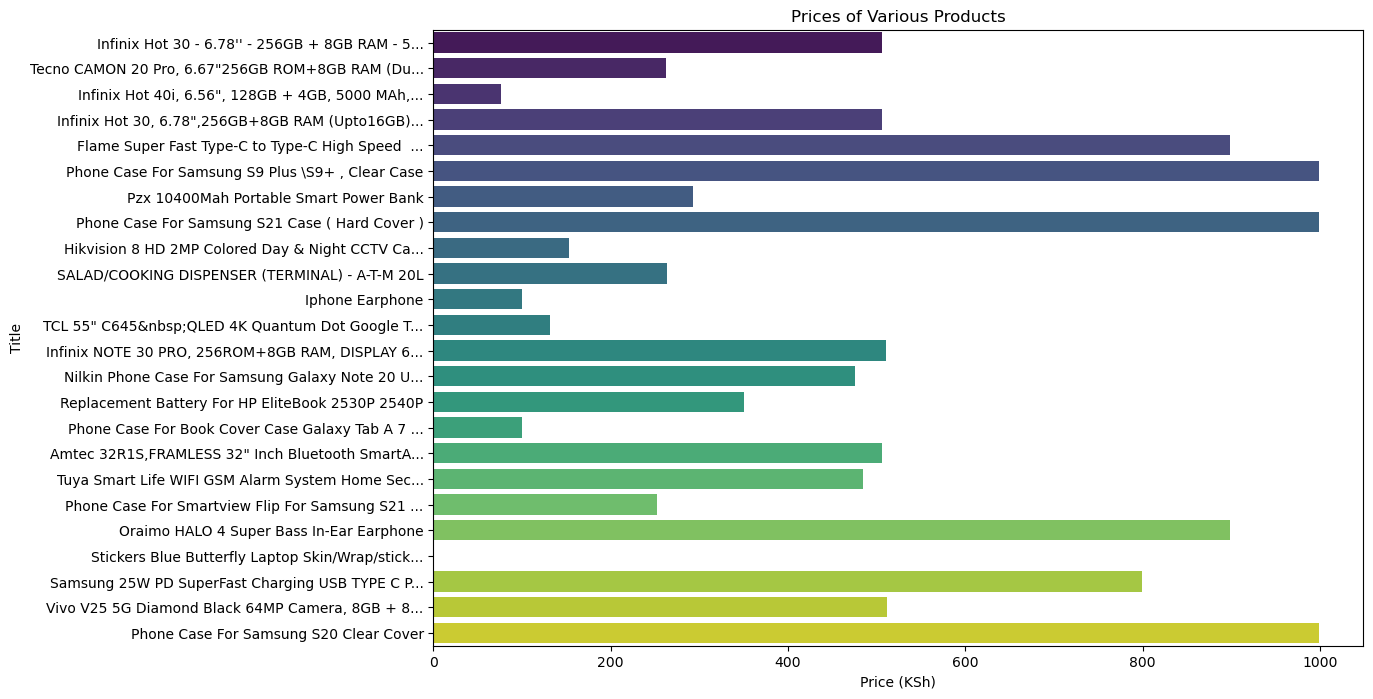

In [19]:
# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='title', data=df, palette='viridis')
plt.xlabel('Price (KSh)')
plt.ylabel('Title')
plt.title('Prices of Various Products')
plt.show()
